## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df_housing = pd.read_csv('Housing.csv')
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Count NAN In Each Field

In [3]:
df_housing.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### More Dataset's Details

In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
## Checking for duplicated rows
df_housing.duplicated().sum()

0

## Convert Categorical into Numerical Data [Classifying]

In [6]:
df_housing.head(8)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
df_housing['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [8]:
## i need furnished=0, semi-furnished=1, unfurnished=2 
#  label encoding
df_housing['furnishingstatus'] = df_housing['furnishingstatus'].astype('category')
df_housing['furnishingstatus'] = df_housing['furnishingstatus'].cat.codes

In [9]:
df_housing.head(8)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,1
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,1
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,2


In [10]:
df_housing['mainroad'] = df_housing['mainroad'].astype('category')
df_housing['mainroad'] = df_housing['mainroad'].cat.codes

df_housing['guestroom'] = df_housing['guestroom'].astype('category')
df_housing['guestroom'] = df_housing['guestroom'].cat.codes

df_housing['basement'] = df_housing['basement'].astype('category')
df_housing['basement'] = df_housing['basement'].cat.codes

df_housing['hotwaterheating'] = df_housing['hotwaterheating'].astype('category')
df_housing['hotwaterheating'] = df_housing['hotwaterheating'].cat.codes

df_housing['airconditioning'] = df_housing['airconditioning'].astype('category')
df_housing['airconditioning'] = df_housing['airconditioning'].cat.codes

df_housing['prefarea'] = df_housing['prefarea'].astype('category')
df_housing['prefarea'] = df_housing['prefarea'].cat.codes

In [11]:
df_housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


<Axes: >

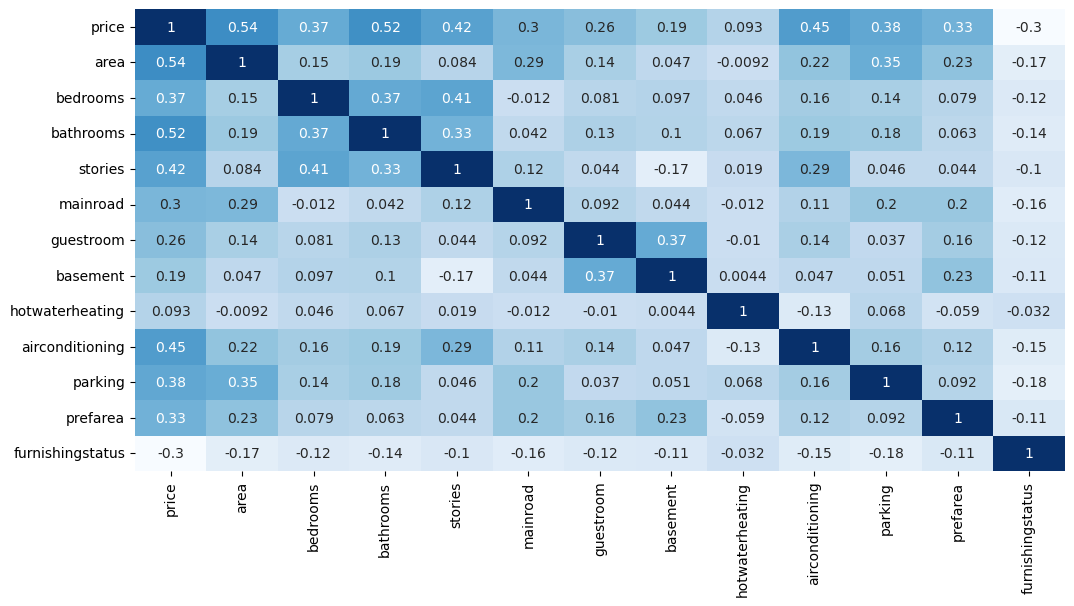

In [12]:
## Pearson correletion
corr = df_housing.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cbar=False, cmap='Blues')

<Axes: xlabel='area', ylabel='price'>

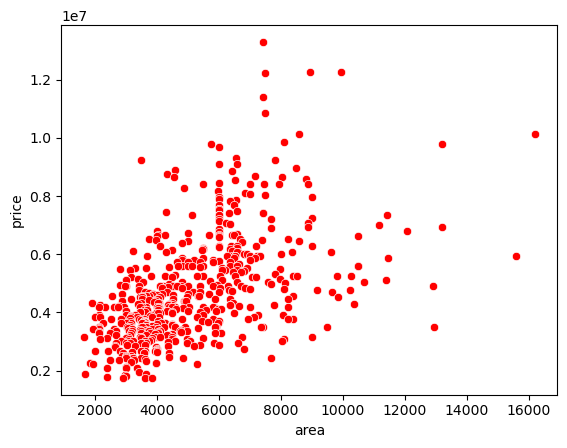

In [13]:
sns.scatterplot(x='area', y='price', data=df_housing, color='red')

## Devide Dataset into Features and Labels


In [14]:
X = df_housing.iloc[:, 1:]
y = df_housing.iloc[:, 0]

In [15]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


## Applying Standerdization 

In [16]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)

In [17]:
X[:5]

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  0.40562287,
        -0.46531479, -0.73453933, -0.2192645 ,  1.4726183 ,  1.51769249,
         1.80494113, -1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  0.40562287,
        -0.46531479, -0.73453933, -0.2192645 ,  1.4726183 ,  2.67940935,
        -0.55403469, -1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  0.40562287,
        -0.46531479,  1.3613975 , -0.2192645 , -0.67906259,  1.51769249,
         1.80494113, -0.09166185],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  0.40562287,
        -0.46531479,  1.3613975 , -0.2192645 ,  1.4726183 ,  2.67940935,
         1.80494113, -1.40628573],
       [ 1.04672629,  1.40341936, -0.57018671,  0.22441013,  0.40562287,
         2.14908276,  1.3613975 , -0.2192645 ,  1.4726183 ,  1.51769249,
        -0.55403469, -1.40628573]])

## Split data into train and test

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

## Training The Linear Regression Model On The Training Set

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)

In [21]:
print(f"the score = {np.ceil(lr.score(x_train, y_train) * 100)} %")

the score = 70.0 %


In [22]:
print(f"Coeffecients:\n{lr.coef_}")

Coeffecients:
[ 472346.59167827   74790.31927323  459276.87115845  362857.39850714
  191654.41984815  139958.83718719  209954.74827069  221831.50769592
  407605.65145841  331233.87706677  226716.47857311 -185466.49719437]


In [23]:
print(f"Intercept:\n{lr.intercept_}")

Intercept:
4796177.115505022


## Ploynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)

In [33]:
lr2 = LinearRegression()
lr2.fit(x_poly, y_train)
y_pred_poly = lr2.predict(x_poly)

In [34]:
print(f"the score = {np.ceil(lr2.score(x_poly, y_train) * 100)} %")

the score = 100.0 %


In [40]:
print(f"the score = {np.ceil(lr2.score(x_test, y_train) * 100)} %")

ValueError: X has 12 features, but LinearRegression is expecting 1820 features as input.

In [35]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [38]:
print(f"Linear Reg: {lr.predict(X[2].reshape(1,-1))} ,Poly Reg:{lr2.predict(poly_reg.fit_transform(X[1].reshape(1,-1)))}, Actual: {y[1]}")

Linear Reg: [10565306.6583963] ,Poly Reg:[12249954.5], Actual: 12250000


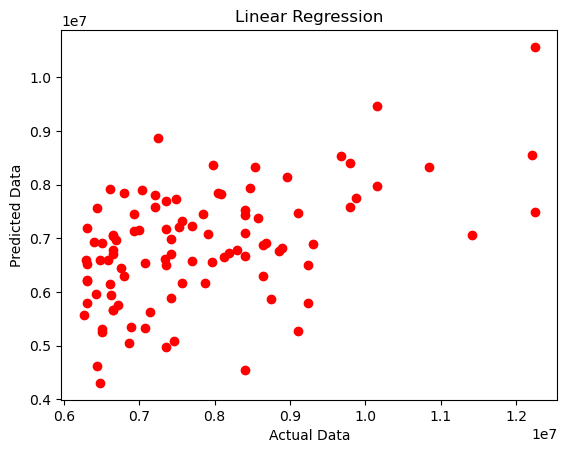

In [29]:
plt.scatter(y[1:100], lr.predict(X[1:100]), color='red')
plt.title('Linear Regression')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

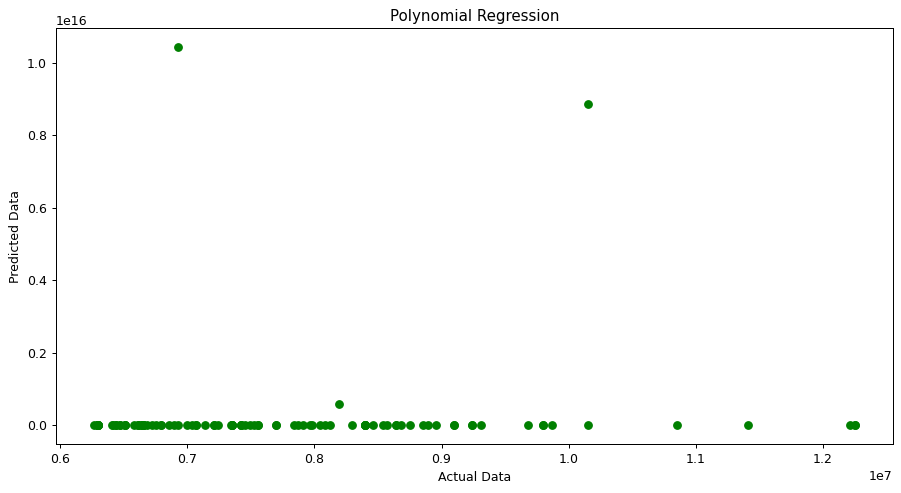

In [30]:
plt.figure(figsize=(12,6), dpi=90)
plt.scatter(y[1:100], lr2.predict(poly_reg.fit_transform(X[1:100])), color='green')
plt.title('Polynomial Regression')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
# plt.xlim(xmin=, xmax=10)
# plt.ylim(ymin=0, ymax=10)

plt.show()

In [31]:
lr.predict(X)

array([ 8131400.54252501, 10565306.6583963 ,  7483859.82242454,
        8555013.64482901,  7068995.63427775,  8321180.23970199,
        9473842.18675589,  7972729.88298485,  7751957.12418159,
        7578291.05544658,  8395693.84711173,  8528887.37651592,
        6894578.9055715 ,  6507224.67879259,  5803636.73184639,
        5272874.59554881,  7467613.00108125,  8149108.58042001,
        6828039.44121866,  6764831.26649594,  5865795.62959426,
        6918411.40350302,  6301352.04618654,  6874577.06619213,
        7377131.03546511,  8326978.93152668,  7931825.91321482,
        4554268.21038862,  7530529.31501728,  7105880.88465241,
        7438167.72487625,  6663625.49494705,  6774576.30845547,
        6729781.09516946,  6659264.78279353,  7822322.99630461,
        7841991.29622075,  8359463.33024403,  6567857.79361433,
        7077273.49473563,  6177344.46270985,  7448113.21069661,
        7221399.9540797 ,  6585036.1841902 ,  7321092.18126808,
        6172379.96131595,  7219665.95948